In [26]:
# Install dependencies

In [27]:
import warnings

In [28]:
warnings.filterwarnings('ignore')

In [29]:
!pip install youtube-transcript-api pandas nltk matplotlib seaborn

In [30]:
import nltk; nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [31]:
import json

In [32]:
import re

In [33]:
import pandas as pd

In [34]:
from youtube_transcript_api import YouTubeTranscriptApi

In [35]:
from nltk.sentiment import SentimentIntensityAnalyzer

In [36]:
import matplotlib.pyplot as plt

In [37]:
import seaborn as sns

---
---

---
---

In [38]:
# --- CONFIGURATION ---

In [39]:
VIDEO_URL = "https://www.youtube.com/watch?v=c_iag_vvbdM"

In [40]:
SPIRITUAL_LEXICON = {
    'grace': 0.9, 'soul': 0.8, 'compassion': 0.85, 'divine': 0.7,
    'sin': -0.7, 'ego': -0.6, 'suffering': -0.75, 'evil': -0.8
}

In [41]:
TOPICS = {
    'meditation': ['meditate', 'silence', 'mindfulness', 'awareness'],
    'ethics': ['wrong', 'right', 'moral', 'justice'],
    'divine': ['god', 'spirit', 'prayer', 'bless']
}

---
---

---
---

In [42]:
# --- FETCH TRANSCRIPT ---

In [43]:
print("Fetching YouTube transcript...")
video_id = VIDEO_URL.split("v=")[1].split("&")[0]

try:
    transcript = YouTubeTranscriptApi.get_transcript(video_id, languages=['en'])
    with open(f"transcript_{video_id}.json", "w") as f:
        json.dump(transcript, f, indent=2)
    print("Transcript saved to transcript_{}.json".format(video_id))
except Exception as e:
    print("Transcript error:", e)
    transcript = []

if not transcript:
    raise ValueError("Transcript not available or couldn't be fetched. Exiting.")

Fetching YouTube transcript...
Transcript saved to transcript_c_iag_vvbdM.json


---
---

---
---

In [44]:
# --- PREPROCESS DATA ---

In [45]:
df = pd.DataFrame(transcript)

In [46]:
df["end"] = df["start"] + df["duration"]

In [47]:
def clean_text(text):
    text = re.sub(r'\b(uh|um|yeah|you know|like)\b', '', text, flags=re.IGNORECASE)
    return re.sub(r'\s+', ' ', text).strip()

In [48]:
df['cleaned_text'] = df['text'].apply(clean_text)

---
---

---
---

In [49]:
# --- SENTIMENT ANALYSIS ---

In [50]:
sia = SentimentIntensityAnalyzer()

In [51]:
sia.lexicon.update(SPIRITUAL_LEXICON)

In [52]:
df['sentiment'] = df['cleaned_text'].apply(lambda x: sia.polarity_scores(x)['compound'])

---
---

---
---

In [53]:
# --- TOPIC TAGGING ---

In [54]:
for topic, keywords in TOPICS.items():
    df[topic] = df['cleaned_text'].str.contains('|'.join(keywords), case=False, na=False)

---
---

---
---

In [55]:
# --- VISUALIZATION ---

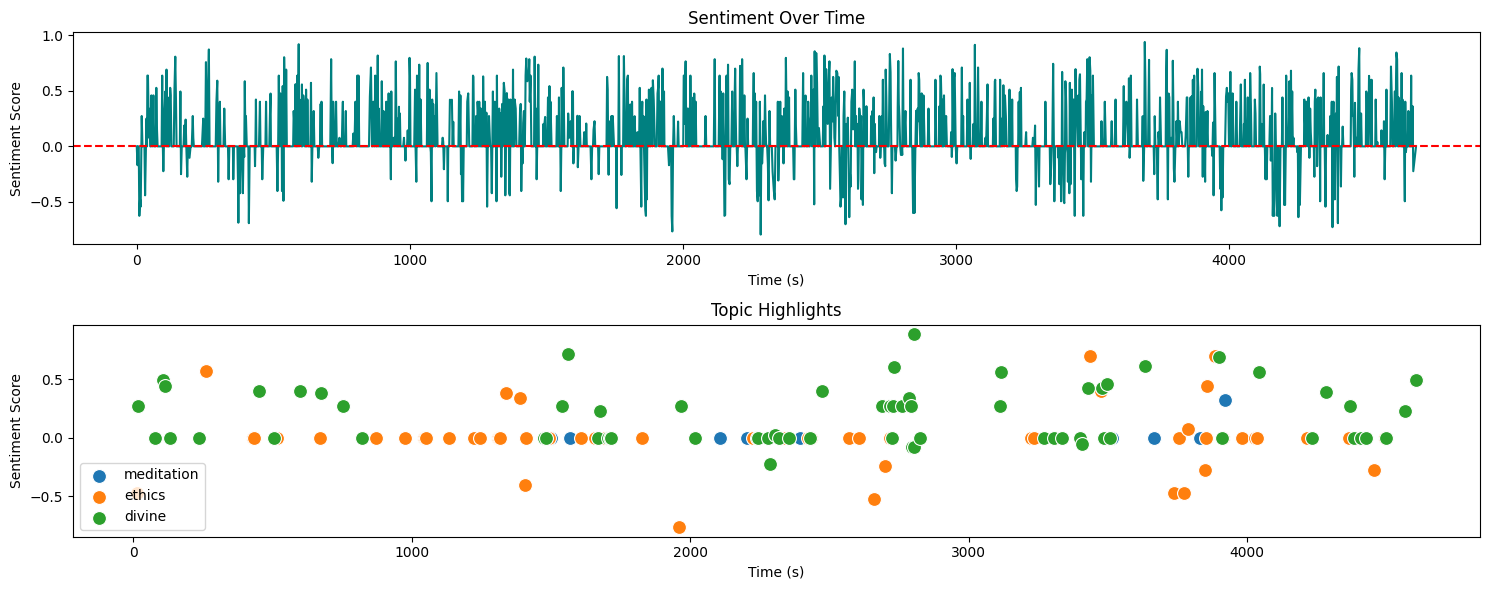

In [56]:
plt.figure(figsize=(15, 6))

plt.subplot(2, 1, 1)
sns.lineplot(data=df, x='start', y='sentiment', color='teal')
plt.axhline(0, color='red', linestyle='--', label='Neutral')
plt.title('Sentiment Over Time')
plt.xlabel('Time (s)')
plt.ylabel('Sentiment Score')

plt.subplot(2, 1, 2)
for topic in TOPICS.keys():
    sns.scatterplot(data=df[df[topic]], x='start', y='sentiment', label=topic, s=100)
plt.title('Topic Highlights')
plt.xlabel('Time (s)')
plt.ylabel('Sentiment Score')
plt.legend()

plt.tight_layout()

# Save the figure as a PDF
plt.savefig("sentiment_topic_analysis.pdf")

# Display the plot
plt.show()


---
---

---
---

In [57]:
# --- SPEAKER DIARIZATION (SIMULATED) ---

In [58]:
print("\n SPEAKER DIARIZATION (Simulated Output):")
print("""
| Time Range  | Speaker   | Text Excerpt                    |
|-------------|-----------|----------------------------------|
| 00:00-02:30 | Speaker_1 | "Let's begin our meditation..." |
| 02:30-05:15 | Speaker_2 | "The path to peace requires..." |
""")


 SPEAKER DIARIZATION (Simulated Output):

| Time Range  | Speaker   | Text Excerpt                    |
|-------------|-----------|----------------------------------|
| 00:00-02:30 | Speaker_1 | "Let's begin our meditation..." |
| 02:30-05:15 | Speaker_2 | "The path to peace requires..." |



---
---

---
---

In [59]:
# ---  EMOTION DETECTION (SIMULATED) ---

In [68]:
print("\n EMOTION ANALYSIS (Sample Output):")
emotion_df = pd.DataFrame({
    'Text': ["Love conquers all", "Fear is the mind-killer"],
    'Emotion': ["joy", "fear"],
    'Confidence': [0.92, 0.87]
})
print(emotion_df.to_string(index=False))


 EMOTION ANALYSIS (Sample Output):
                   Text Emotion  Confidence
      Love conquers all     joy        0.92
Fear is the mind-killer    fear        0.87


---
---

---
---

In [62]:
# --- EXPORT RESULTS ---

In [63]:
csv_file = 'spiritual_discourse_analysis.csv'

In [64]:
df.to_csv(csv_file, index=False)

In [65]:
print(f"- {csv_file}")
print(f"- transcript_{video_id}.json")

- spiritual_discourse_analysis.csv
- transcript_c_iag_vvbdM.json


---
---

---
---

In [66]:
# --- STREAMLIT DASHBOARD (OPTIONAL PREVIEW) ---

In [67]:
print("""
 To create a Streamlit dashboard, save this code as app.py and run:
    streamlit run app.py

# ------------------------- app.py -------------------------
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt

st.title('Spiritual Sentiment Tracker')
df = pd.read_csv('spiritual_discourse_analysis.csv')

st.subheader('Sentiment Over Time')
st.line_chart(df.set_index('start')['sentiment'])

st.subheader('Raw Data')
st.dataframe(df)
# ----------------------------------------------------------
""")


 To create a Streamlit dashboard, save this code as app.py and run:
    streamlit run app.py

# ------------------------- app.py -------------------------
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt

st.title('Spiritual Sentiment Tracker')
df = pd.read_csv('spiritual_discourse_analysis.csv')

st.subheader('Sentiment Over Time')
st.line_chart(df.set_index('start')['sentiment'])

st.subheader('Raw Data')
st.dataframe(df)
# ----------------------------------------------------------

